Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 - 13s - loss: 0.4025 - acc: 0.8684 - val_loss: 0.0590 - val_acc: 0.9830
Epoch 2/12
 - 12s - loss: 0.1093 - acc: 0.9682 - val_loss: 0.0342 - val_acc: 0.9896
Epoch 3/12
 - 12s - loss: 0.0838 - acc: 0.9758 - val_loss: 0.0301 - val_acc: 0.9905
Epoch 4/12
 - 12s - loss: 0.0673 - acc: 0.9806 - val_loss: 0.0240 - val_acc: 0.9924
Epoch 5/12
 - 12s - loss: 0.0594 - acc: 0.9815 - val_loss: 0.0216 - val_acc: 0.9937
Epoch 6/12
 - 12s - loss: 0.0553 - acc: 0.9840 - val_loss: 0.0206 - val_acc: 0.9938
Epoch 7/12
 - 12s - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0198 - val_acc: 0.9935
Epoch 8/12
 - 12s - loss: 0.0460 - acc: 0.9864 - val_loss: 0.0213 - val_acc: 0.9944
Epoch 9/12
 - 12s - loss: 0.0436 - acc: 0.9875 - val_loss: 0.0187 - val_acc: 0.9941
Epoch 10/12
 - 12s - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0201 - val_acc: 0.9937
Epoch 11/12
 - 11s - loss: 0.0407 - acc: 0.9877 - val_loss: 0.0176 - val_acc: 0.9942
Epoch 12/12
 - 11s - los

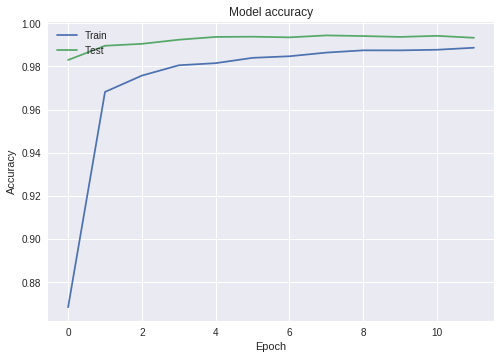

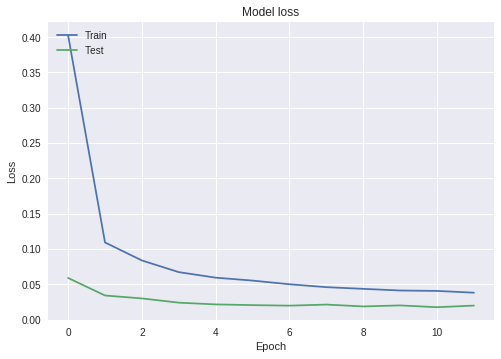

In [18]:
from __future__ import print_function # customized print function, should be listed before anything as a preprocess
import keras
from keras.datasets import mnist # Dataset to be used
from keras.models import Sequential # Sequential model having linear stack of layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K # Keras backend
from keras.callbacks import History
history = History()
import matplotlib.pyplot as plt # To plot the data


batch_size = 128 # no ef examples taken simultaneously
num_classes = 10 # 0,1,2,3,4,5,6,7,8,9
epochs = 12 # Iterations

# input image dimensions
img_rows, img_cols = 28, 28 # Default dimensions

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # to reshape when not rgb as in this case, fake dimension created to fit model
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') # image as a matrix
x_test = x_test.astype('float32')
x_train /= 255 # normalize image to train efficiently
x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes) #100000000 vectorize
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential() # Initialize the model to be sequential/linear stack

#layer1 hidden
#model.add(Conv2D(32, kernel_size=(8,8), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=input_shape)) # change 3X3 TO 5X5, 32 neurons
# The first layer needs to get the input shape, rest layers can do automatic shape inference
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None) #max from 2x2 matrix, padding = append zeroes to make matrix back to init size
# Strides for downscaling, none means default to pool size, 2,2 means half the input size in both dimensions
model.add(Dropout(0.4)) # 40% input units set to 0 to avoid overfitting

#layer2 hidden
#model.add(Conv2D(64, (8,8), activation='relu'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


#layer3 not hidden
model.add(Flatten()) # To get the class values in 10
model.add(Dense(128, activation='relu')) # Fully connected layer
model.add(Dropout(0.5)) # drop 50%
model.add(Dense(num_classes, activation='softmax')) #128 feature maps fit to 10 classes with probability

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(), metrics=['accuracy']) #compile model, search for optimizers
#Categorical = vector of dimension 10, 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))
# Fit = trains a model
score = model.evaluate(x_test, y_test, verbose=2)
# Returns scalar loss
print('Test loss:', score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()